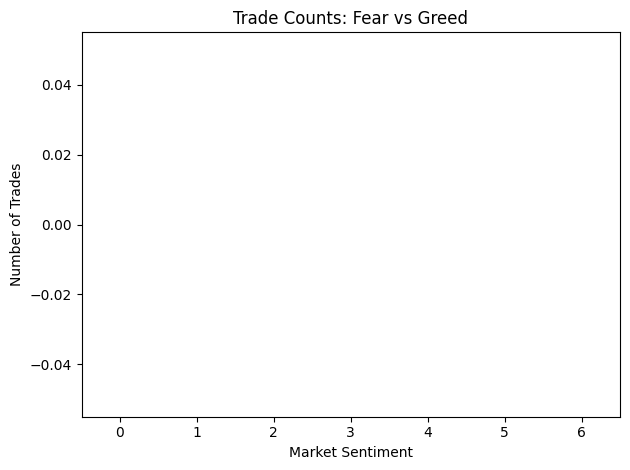

⚠️ Column 'size' not found. Skipping Plot 2.
⚠️ All values in 'closed_pnl' are NaN.
🧾 Fallback: Showing closed PnL summary stats:
Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


In [17]:
# notebook_1.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Set up folders
os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)

# Step 2: Load data
sentiment_df = pd.read_csv('csv_files/fear_greed_index.csv')
trader_df = pd.read_csv('csv_files/historical_data.csv')

# Step 3: Clean column names
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(' ', '_')
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 4: Convert to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'])
trader_df['date'] = trader_df['timestamp'].dt.date

# Step 5: Merge on 'date'
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

# Step 6: Save merged file
merged_df.to_csv('csv_files/merged_data.csv', index=False)

# Step 7: Plot 1 - Trade count by sentiment
sns.countplot(x='classification', data=merged_df)
plt.title('Trade Counts: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.savefig('outputs/trade_counts.png')
plt.show()

# Step 8: Average Trade Volume Summary (using 'size')
if 'size' in merged_df.columns:
    volume_df = merged_df[['classification', 'size']].dropna()

    if not volume_df.empty:
        avg_volume = volume_df.groupby('classification')['size'].mean()
        avg_volume.plot(kind='bar', title='Average Trade Volume by Sentiment', color='skyblue')
        plt.ylabel('Avg Trade Volume')
        plt.tight_layout()
        plt.savefig('outputs/avg_trade_volume.png')
        plt.show()
    else:
        print("⚠️ 'size' column exists but no valid data to plot.")
        print("🧾 Fallback: Showing trade volume stats instead:")
        print(volume_df.groupby('classification')['size'].describe())
else:
    print("⚠️ Column 'size' not found. Skipping Plot 2.")

# Step 9: Closed PnL Summary
if 'closed_pnl' in merged_df.columns:
    pnl_df = merged_df[['classification', 'closed_pnl']].dropna()

    if not pnl_df.empty:
        sns.boxplot(x='classification', y='closed_pnl', data=pnl_df)
        plt.title('Profitability: Fear vs Greed')
        plt.xlabel('Market Sentiment')
        plt.ylabel('Closed PnL')
        plt.tight_layout()
        plt.savefig('outputs/profit_distribution.png')
        plt.show()
    else:
        print("⚠️ All values in 'closed_pnl' are NaN.")
        print("🧾 Fallback: Showing closed PnL summary stats:")
        print(pnl_df.groupby('classification')['closed_pnl'].describe())
else:
    print("⚠️ Column 'closed_pnl' not found. Skipping Plot 3.")


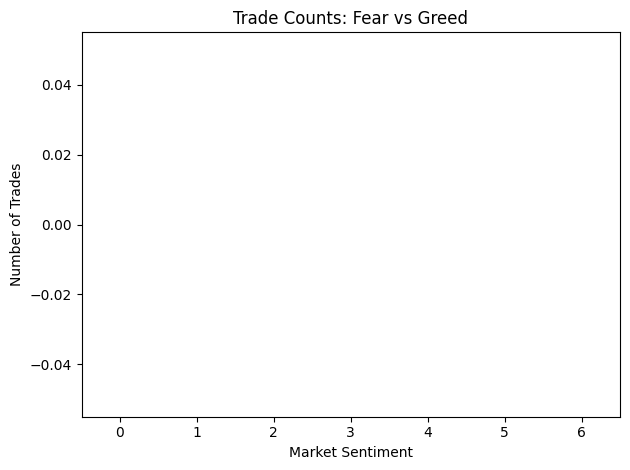

⚠️ Column 'size' not found. Skipping Plot 2.
⚠️ All values in 'closed_pnl' are NaN.
🧾 Fallback: Showing closed PnL summary stats:
Empty DataFrame
Columns: [(closed_pnl, count), (closed_pnl, mean), (closed_pnl, std), (closed_pnl, min), (closed_pnl, 25%), (closed_pnl, 50%), (closed_pnl, 75%), (closed_pnl, max)]
Index: []


In [18]:
# notebook_1.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: Set up folders
os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)

# Step 2: Load data
sentiment_df = pd.read_csv('csv_files/fear_greed_index.csv')
trader_df = pd.read_csv('csv_files/historical_data.csv')

# Step 3: Clean column names
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(' ', '_')
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 4: Convert to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'])
trader_df['date'] = trader_df['timestamp'].dt.date

# Step 5: Merge on 'date'
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

# Step 6: Save merged file
merged_df.to_csv('csv_files/merged_data.csv', index=False)

# Step 7: Plot 1 - Trade count by sentiment
sns.countplot(x='classification', data=merged_df)
plt.title('Trade Counts: Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.savefig('outputs/trade_counts.png')
plt.show()

# Step 8: Average Trade Volume Summary (using 'size')
if 'size' in merged_df.columns:
    avg_volume = merged_df.groupby('classification')['size'].mean().dropna()

    if not avg_volume.empty:
        avg_volume.plot(kind='bar', title='Average Trade Volume by Sentiment', color='skyblue')
        plt.ylabel('Avg Trade Volume')
        plt.tight_layout()
        plt.savefig('outputs/avg_trade_volume.png')
        plt.show()
    else:
        print("⚠️ 'size' exists but all values are NaN.")
        print("🧾 Showing fallback stats instead:")
        print(merged_df.groupby('classification')['size'].describe())
else:
    print("⚠️ Column 'size' not found. Skipping Plot 2.")

# Step 9: Closed PnL Summary
if 'closed_pnl' in merged_df.columns:
    pnl_df = merged_df[['classification', 'closed_pnl']].dropna()

    if not pnl_df.empty:
        sns.boxplot(x='classification', y='closed_pnl', data=pnl_df)
        plt.title('Profitability: Fear vs Greed')
        plt.xlabel('Market Sentiment')
        plt.ylabel('Closed PnL')
        plt.tight_layout()
        plt.savefig('outputs/profit_distribution.png')
        plt.show()
    else:
        print("⚠️ All values in 'closed_pnl' are NaN.")
        print("🧾 Fallback: Showing closed PnL summary stats:")
        print(pnl_df.groupby('classification').describe(include='all'))
else:
    print("⚠️ Column 'closed_pnl' not found. Skipping Plot 3.")

